In [1]:
import pandas as pd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
inertia_df=pd.read_csv("inertia.csv")

In [4]:
inertia_df

Settlement Date  Settlement Period  Outturn Inertia  \
0          2023-04-01                  1              142   
1          2023-04-01                  2              141   
2          2023-04-01                  3              141   
3          2023-04-01                  4              142   
4          2023-04-01                  5              142   
...               ...                ...              ...   
17471      2024-03-31                 42              170   
17472      2024-03-31                 43              161   
17473      2024-03-31                 44              148   
17474      2024-03-31                 45              145   
17475      2024-03-31                 46              143   

       Market Provided Inertia  
0                          130  
1                          129  
2                          128  
3                          129  
4                          129  
...                        ...  
17471                      150  
17472                      139  
17473                      134  
17474                      126  
17475                      121  

[17476 rows x 4 columns]

In [5]:
inertia_df.dtypes

Settlement Date            object
Settlement Period           int64
Outturn Inertia             int64
Market Provided Inertia     int64
dtype: object

In [6]:
inertia_df['Inertia Gap'] = inertia_df['Outturn Inertia'] - inertia_df['Market Provided Inertia']

In [7]:
inertia_df[['Outturn Inertia', 'Market Provided Inertia', 'Inertia Gap']].describe()

Outturn Inertia  Market Provided Inertia   Inertia Gap
count     17476.000000             17476.000000  17476.000000
mean        191.520428               179.961376     11.559052
std          51.093897                56.112392     11.796724
min          44.000000                49.000000    -47.000000
25%         150.000000               136.000000      3.000000
50%         184.000000               177.000000      9.000000
75%         220.250000               214.000000     18.000000
max         358.000000               356.000000     68.000000

In [8]:
unstable = inertia_df[inertia_df['Outturn Inertia'] < 120]
unstable[['Outturn Inertia', 'Market Provided Inertia', 'Inertia Gap']].describe()

Outturn Inertia  Market Provided Inertia  Inertia Gap
count        55.000000                55.000000    55.000000
mean         65.872727                79.945455   -14.072727
std          23.935140                15.965725    19.342770
min          44.000000                49.000000   -47.000000
25%          50.000000                67.500000   -28.000000
50%          58.000000                81.000000   -17.000000
75%          65.000000                94.500000    -3.000000
max         119.000000               105.000000    29.000000

In [9]:
print(inertia_df.head())

  Settlement Date  Settlement Period  Outturn Inertia  \
0      2023-04-01                  1              142   
1      2023-04-01                  2              141   
2      2023-04-01                  3              141   
3      2023-04-01                  4              142   
4      2023-04-01                  5              142   

   Market Provided Inertia  Inertia Gap  
0                      130           12  
1                      129           12  
2                      128           13  
3                      129           13  
4                      129           13  


In [10]:
print(inertia_df.isnull().sum())

Settlement Date            0
Settlement Period          0
Outturn Inertia            0
Market Provided Inertia    0
Inertia Gap                0
dtype: int64


In [11]:
inertia_df['Datetime'] = pd.to_datetime(inertia_df['Settlement Date']) + pd.to_timedelta(
    (inertia_df['Settlement Period'] - 1) * 30, unit='m'
)

In [12]:
print(inertia_df[['Settlement Date', 'Settlement Period', 'Datetime']].head())

  Settlement Date  Settlement Period            Datetime
0      2023-04-01                  1 2023-04-01 00:00:00
1      2023-04-01                  2 2023-04-01 00:30:00
2      2023-04-01                  3 2023-04-01 01:00:00
3      2023-04-01                  4 2023-04-01 01:30:00
4      2023-04-01                  5 2023-04-01 02:00:00


In [13]:
inertia_df['Stability Status'] = inertia_df['Outturn Inertia'].apply(
    lambda x: 'Unstable' if x < 120 else 'Stable'
)


In [14]:
print(inertia_df[['Datetime', 'Outturn Inertia', 'Market Provided Inertia', 'Inertia Gap', 'Stability Status']].head())

             Datetime  Outturn Inertia  Market Provided Inertia  Inertia Gap  \
0 2023-04-01 00:00:00              142                      130           12   
1 2023-04-01 00:30:00              141                      129           12   
2 2023-04-01 01:00:00              141                      128           13   
3 2023-04-01 01:30:00              142                      129           13   
4 2023-04-01 02:00:00              142                      129           13   

  Stability Status  
0           Stable  
1           Stable  
2           Stable  
3           Stable  
4           Stable  


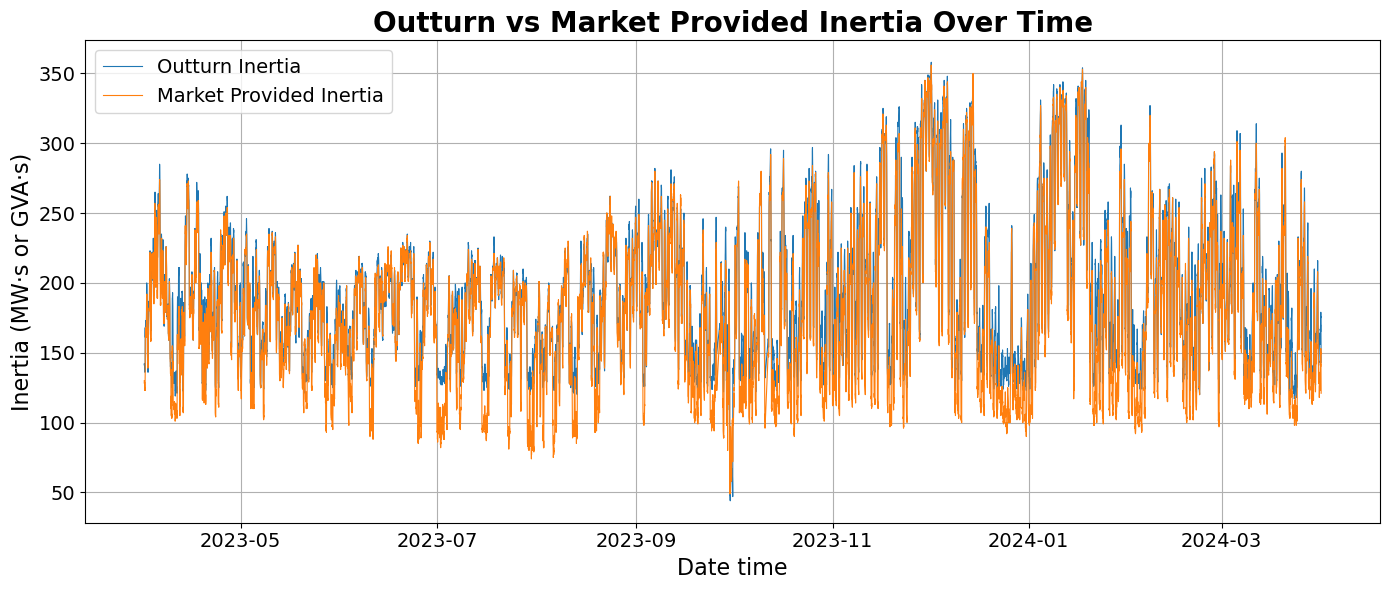

In [15]:
plt.figure(figsize=(14, 6))

# Plotting the two inertia series
plt.plot(inertia_df['Datetime'], inertia_df['Outturn Inertia'], label='Outturn Inertia', linewidth=0.8)
plt.plot(inertia_df['Datetime'], inertia_df['Market Provided Inertia'], label='Market Provided Inertia', linewidth=0.8)

# Add title and axis labels with larger font size
plt.title("Outturn vs Market Provided Inertia Over Time", fontsize=20, fontweight="bold")
plt.xlabel("Date time", fontsize=16)
plt.ylabel("Inertia (MW·s or GVA·s)", fontsize=16)

# Increase tick label size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Legend with larger font
plt.legend(fontsize=14)

# Grid and layout
plt.grid(True)
plt.tight_layout()
plt.show()


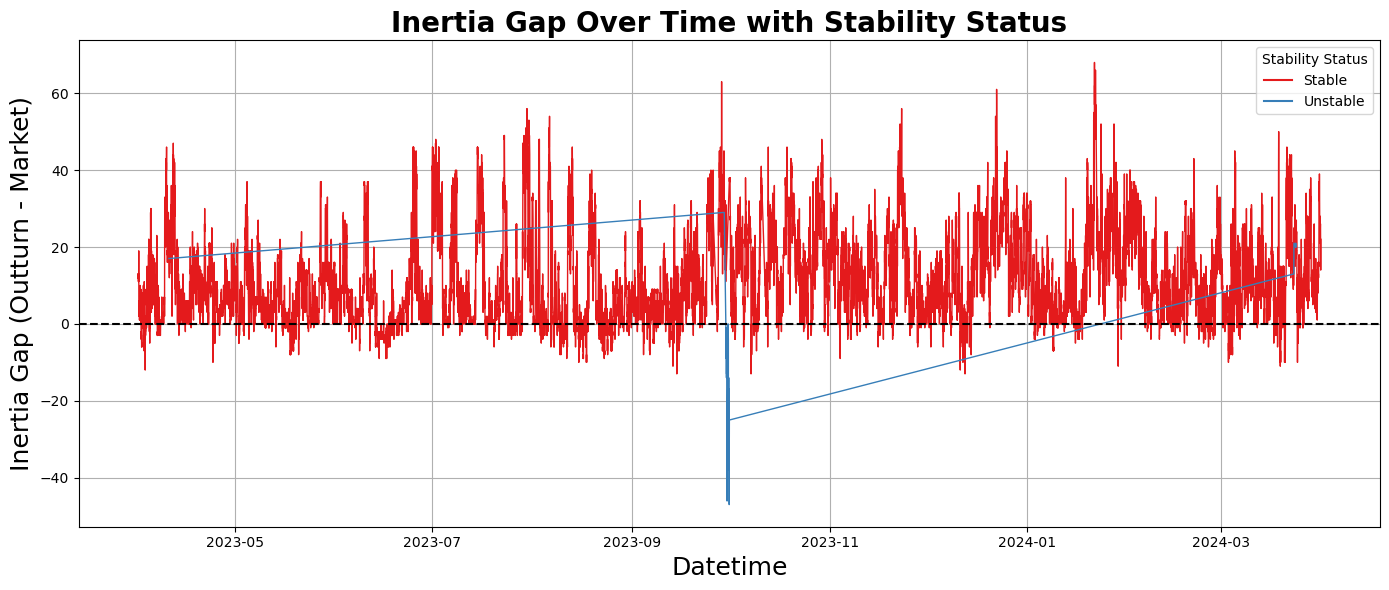

In [16]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Datetime', y='Inertia Gap', data=inertia_df, hue='Stability Status', palette='Set1', linewidth=1.0)
plt.axhline(0, linestyle='--', color='black')
plt.title("Inertia Gap Over Time with Stability Status", fontsize=20, fontweight= "bold")
plt.xlabel("Datetime", fontsize=18)
plt.ylabel("Inertia Gap (Outturn - Market)",fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()


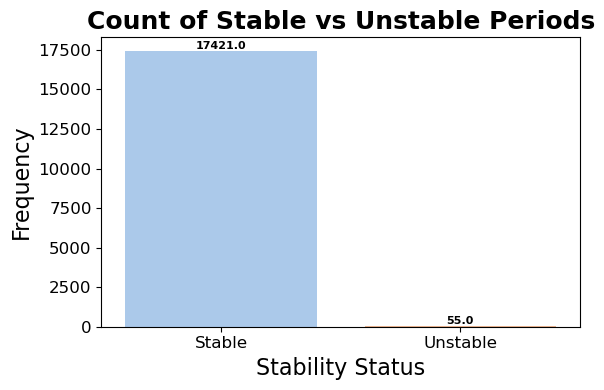

In [17]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=inertia_df, x='Stability Status', palette='pastel')
plt.title("Count of Stable vs Unstable Periods", fontsize=18, fontweight="bold")
plt.xlabel("Stability Status", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

In [18]:
print(inertia_df['Stability Status'].value_counts())


Stable      17421
Unstable       55
Name: Stability Status, dtype: int64


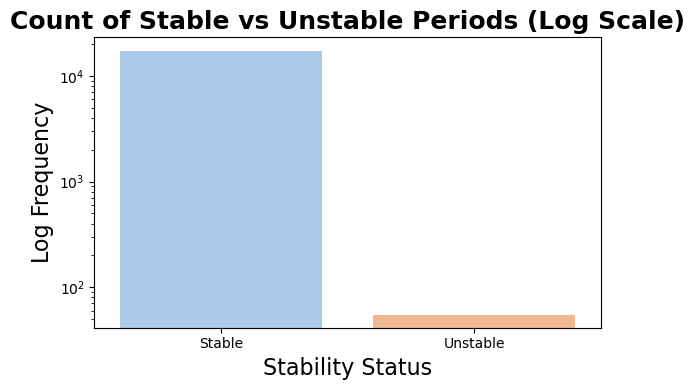

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=inertia_df, x='Stability Status', palette='pastel')
plt.yscale('log')  # <-- logarithmic scale
plt.title("Count of Stable vs Unstable Periods (Log Scale)", fontsize=18, fontweight="bold")
plt.xlabel("Stability Status", fontsize=16)
plt.ylabel("Log Frequency", fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
auction_df = pd.read_csv("static-firm-frequency-response-auction-results.csv")


In [22]:
print("Shape:", auction_df.shape)
print("\nColumn Names:", auction_df.columns.tolist())
print("\nData Types:\n", auction_df.dtypes)
print("\nMissing Values:\n", auction_df.isnull().sum())
print("\nFirst 5 Rows:\n", auction_df.head())

Shape: (124148, 15)

Column Names: ['Date', 'Provider', 'Unit', 'Delivery Start', 'Delivery End', 'EFA', 'Service', 'Status', 'Volume', 'Accepted Volume', 'Price', 'Clearing Price', 'Technology Type', 'Location', 'Rank']

Data Types:
 Date                object
Provider            object
Unit                object
Delivery Start      object
Delivery End        object
EFA                  int64
Service             object
Status              object
Volume               int64
Accepted Volume      int64
Price              float64
Clearing Price     float64
Technology Type     object
Location            object
Rank                 int64
dtype: object

Missing Values:
 Date                0
Provider            0
Unit                0
Delivery Start      0
Delivery End        0
EFA                 0
Service             0
Status              0
Volume              0
Accepted Volume     0
Price               0
Clearing Price      0
Technology Type    87
Location           87
Rank                

In [23]:
print("\nSummary Stats:\n", auction_df[['Price', 'Clearing Price', 'Volume', 'Accepted Volume']].describe())


Summary Stats:
                Price  Clearing Price         Volume  Accepted Volume
count  124148.000000   124148.000000  124148.000000    124148.000000
mean        2.244118        4.074352       8.815124         7.726004
std         2.107097        2.479951       7.254451         7.499619
min         0.010000        0.400000       1.000000         0.000000
25%         0.600000        2.300000       2.000000         1.000000
50%         1.890000        3.770000       6.000000         5.000000
75%         3.000000        5.660000      18.000000        17.000000
max       100.000000       16.570000      37.000000        37.000000


In [24]:
# Convert £/MW·h to ₹/MW·s using assumed exchange rate of ₹100 per £
exchange_rate = 100  # You can change this
auction_df['Price per MWs (₹)'] = (auction_df['Price'] * exchange_rate) / 3600

# Preview converted values
print(auction_df[['Price', 'Price per MWs (₹)']].head())

   Price  Price per MWs (₹)
0   0.70           0.019444
1   1.00           0.027778
2   3.50           0.097222
3   3.63           0.100833
4   3.63           0.100833


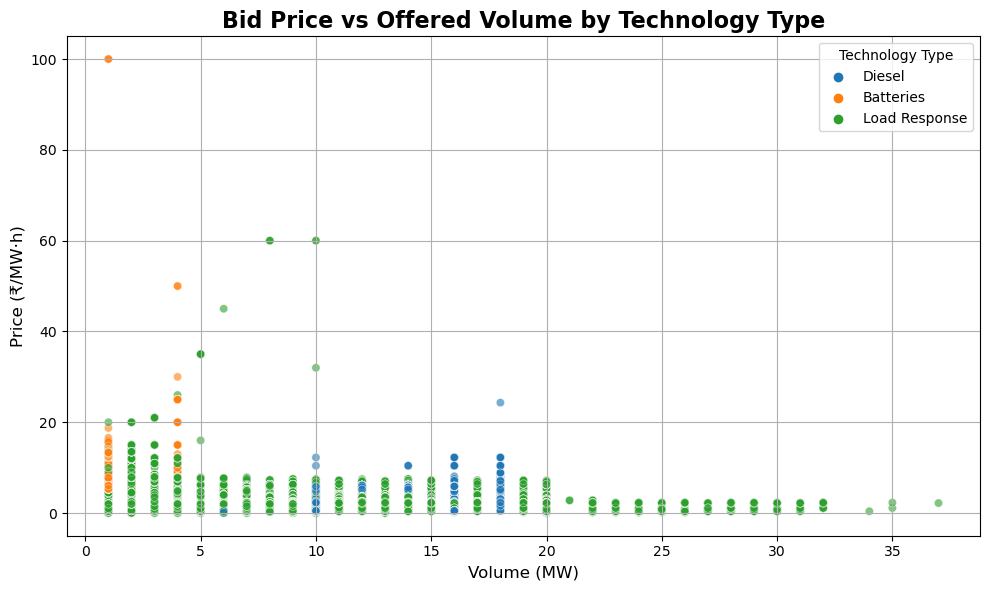

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=auction_df, x='Volume', y='Price', hue='Technology Type', alpha=0.6)
plt.title("Bid Price vs Offered Volume by Technology Type", fontsize=16, fontweight='bold')
plt.xlabel("Volume (MW)", fontsize=12)
plt.ylabel("Price (₹/MW·h)", fontsize=12)
plt.legend(title="Technology Type", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

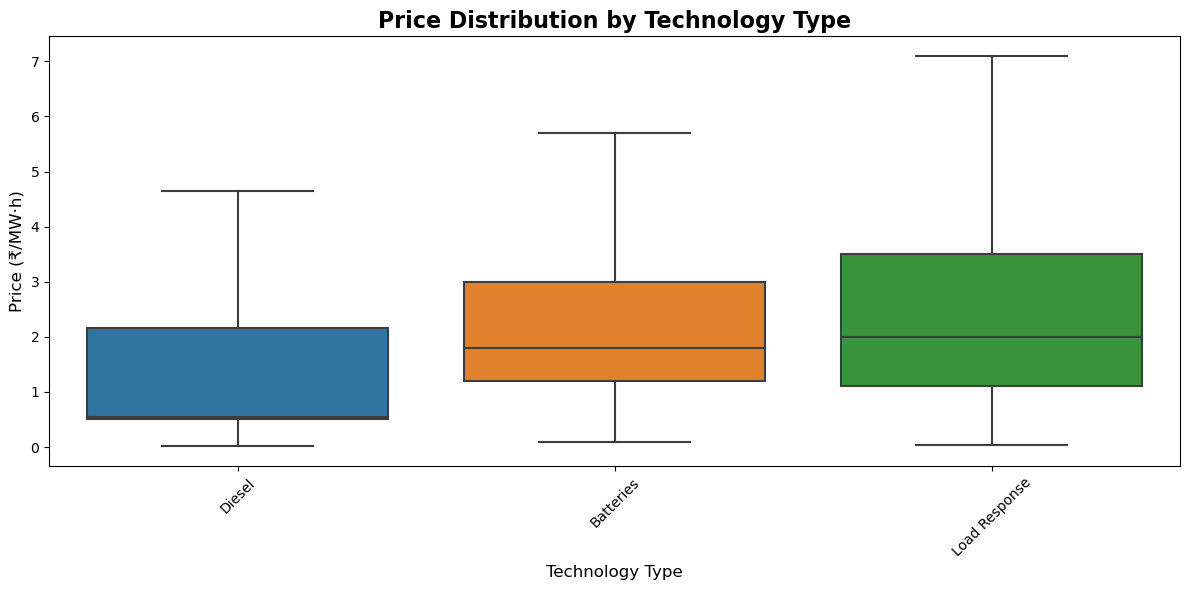

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=auction_df, x='Technology Type', y='Price', showfliers=False)
plt.title("Price Distribution by Technology Type", fontsize=16, fontweight='bold')
plt.xlabel("Technology Type", fontsize=12)
plt.ylabel("Price (₹/MW·h)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

['Date', 'Provider', 'Unit', 'Delivery Start', 'Delivery End', 'EFA', 'Service', 'Status', 'Volume', 'Accepted Volume', 'Price', 'Clearing Price', 'Technology Type', 'Location', 'Rank', 'Price per MWs (₹)']


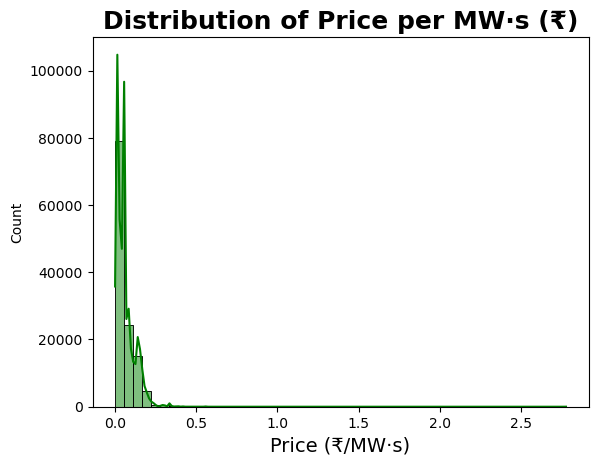

In [27]:
sns.histplot(auction_df['Price per MWs (₹)'], bins=50, kde=True, color='green')
plt.title("Distribution of Price per MW·s (₹)", fontsize=18, fontweight='bold')
plt.xlabel("Price (₹/MW·s)", fontsize=14)
print(auction_df.columns.tolist())

In [28]:
valid_bids = auction_df[(auction_df['Accepted Volume'] > 0) & (auction_df['Technology Type'].notnull())]

provider_rank = (
    valid_bids.groupby(['Provider', 'Technology Type'])
    .agg({'Accepted Volume': 'sum', 'Price per MWs (₹)': 'mean'})
    .reset_index()
)

provider_rank['Efficiency Score'] = provider_rank['Price per MWs (₹)'] / provider_rank['Accepted Volume']
provider_rank_sorted = provider_rank.sort_values(by='Efficiency Score').reset_index(drop=True)

In [29]:
provider_rank_sorted.to_csv("ranked_inertia_providers.csv", index=False)
print("Exported to: ranked_inertia_providers.csv")

Exported to: ranked_inertia_providers.csv


In [30]:
battery_providers = provider_rank_sorted[provider_rank_sorted['Technology Type'].str.lower() == 'batteries']
print(battery_providers.head(10))

               Provider Technology Type  Accepted Volume  Price per MWs (₹)  \
17     Levelise Limited       Batteries            16638           0.058237   
18  AXLE ENERGY LIMITED       Batteries              535           0.002778   
19    Zenobe Energy Ltd       Batteries             3306           0.032766   
21           Anesco Ltd       Batteries              320           0.175000   

    Efficiency Score  
17          0.000004  
18          0.000005  
19          0.000010  
21          0.000547  


In [31]:
# Load the dataset
res_df = pd.read_csv("india_yearly_full_release_long_format.csv")

# Basic info
print("Shape:", res_df.shape)
print("Columns:", res_df.columns.tolist())
print("Data Types:\n", res_df.dtypes)
print("Missing Values:\n", res_df.isnull().sum())
print("Preview:\n", res_df.head())

Shape: (14388, 13)
Columns: ['Country', 'Country code', 'State', 'State code', 'State type', 'Year', 'Category', 'Subcategory', 'Variable', 'Unit', 'Value', 'YoY absolute change', 'YoY % change']
Data Types:
 Country                 object
Country code            object
State                   object
State code              object
State type              object
Year                     int64
Category                object
Subcategory             object
Variable                object
Unit                    object
Value                  float64
YoY absolute change    float64
YoY % change           float64
dtype: object
Missing Values:
 Country                    0
Country code               0
State                      0
State code                 0
State type                 0
Year                       0
Category                   0
Subcategory                0
Variable                   0
Unit                       0
Value                    122
YoY absolute change     7432
YoY % cha

In [32]:
# Define keywords
renewables = ['Solar', 'Wind', 'Hydro', 'Bioenergy', 'Renewables']
fossils = ['Coal', 'Fossil', 'Lignite', 'Gas', 'Diesel']

# Classify each row
res_df['Energy Type'] = res_df['Variable'].apply(
    lambda x: 'Renewable' if any(keyword.lower() in str(x).lower() for keyword in renewables)
    else 'Fossil' if any(keyword.lower() in str(x).lower() for keyword in fossils)
    else 'Other'
)

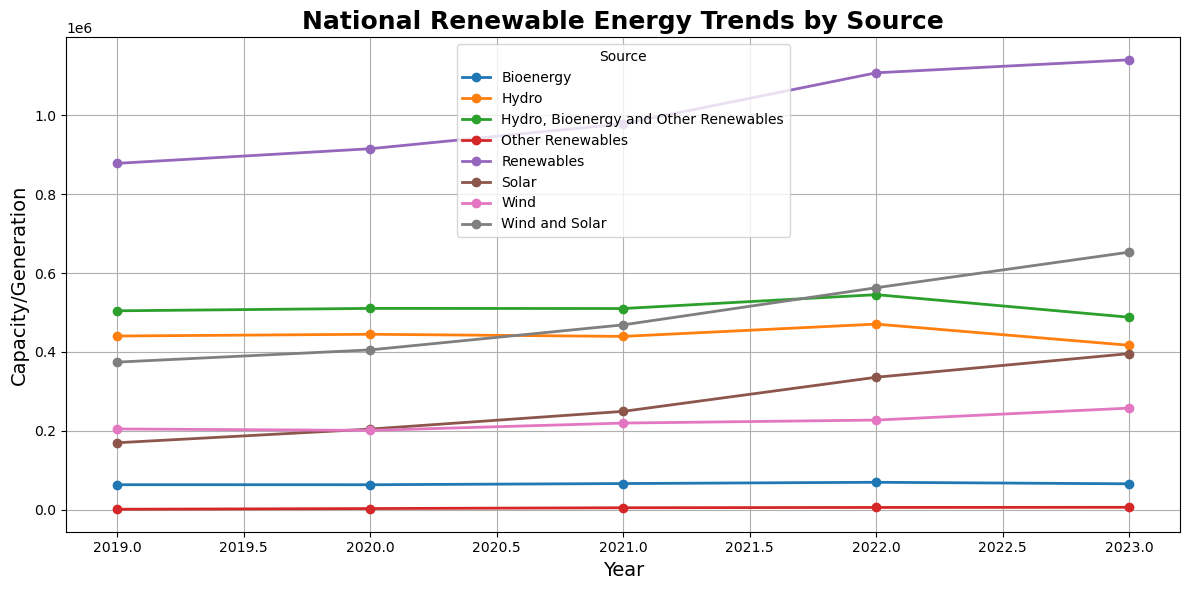

In [33]:
res_filtered = res_df[res_df['Variable'].str.contains('|'.join(renewables), case=False, na=False)]

res_trend = (
    res_filtered.groupby(['Year', 'Variable'])['Value']
    .sum()
    .reset_index()
    .sort_values(by=['Year', 'Variable'])
)

res_pivot = res_trend.pivot(index='Year', columns='Variable', values='Value')

# Plot
res_pivot.plot(marker='o', linewidth=2, figsize=(12, 6))
plt.title("National Renewable Energy Trends by Source", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Capacity/Generation", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Source", fontsize=10)
plt.show()


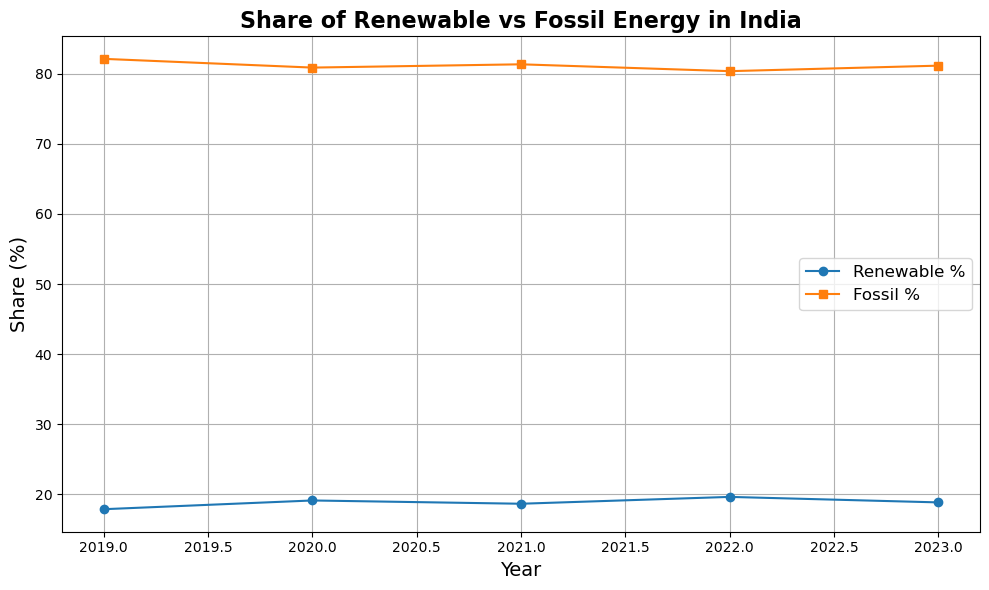

In [34]:
energy_mix_df = res_df[res_df['Energy Type'].isin(['Renewable', 'Fossil'])]

yearly_mix = (
    energy_mix_df.groupby(['Year', 'Energy Type'])['Value']
    .sum()
    .reset_index()
    .pivot(index='Year', columns='Energy Type', values='Value')
)

yearly_mix['Total'] = yearly_mix.sum(axis=1)
yearly_mix['RES %'] = (yearly_mix['Renewable'] / yearly_mix['Total']) * 100
yearly_mix['Fossil %'] = (yearly_mix['Fossil'] / yearly_mix['Total']) * 100

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_mix.index, yearly_mix['RES %'], marker='o', label='Renewable %')
plt.plot(yearly_mix.index, yearly_mix['Fossil %'], marker='s', label='Fossil %')
plt.title("Share of Renewable vs Fossil Energy in India", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Share (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
# Recalculate statewise renewable/fossil energy mix
statewise_mix = (
    res_df[res_df['Energy Type'].isin(['Renewable', 'Fossil'])]
    .groupby(['Year', 'State', 'Energy Type'])['Value']
    .sum()
    .reset_index()
    .pivot_table(index=['Year', 'State'], columns='Energy Type', values='Value', fill_value=0)
    .reset_index()
)

# Add total and percentage
statewise_mix['Total'] = statewise_mix['Fossil'] + statewise_mix['Renewable']
statewise_mix['RES %'] = (statewise_mix['Renewable'] / statewise_mix['Total']) * 100



In [36]:
# Extract top and bottom RES share states
latest_year = statewise_mix['Year'].max()

top_states = (
    statewise_mix[statewise_mix['Year'] == latest_year]
    .sort_values(by='RES %', ascending=False)
    .head(10)
)

bottom_states = (
    statewise_mix[statewise_mix['Year'] == latest_year]
    .sort_values(by='RES %', ascending=True)
    .head(10)
)

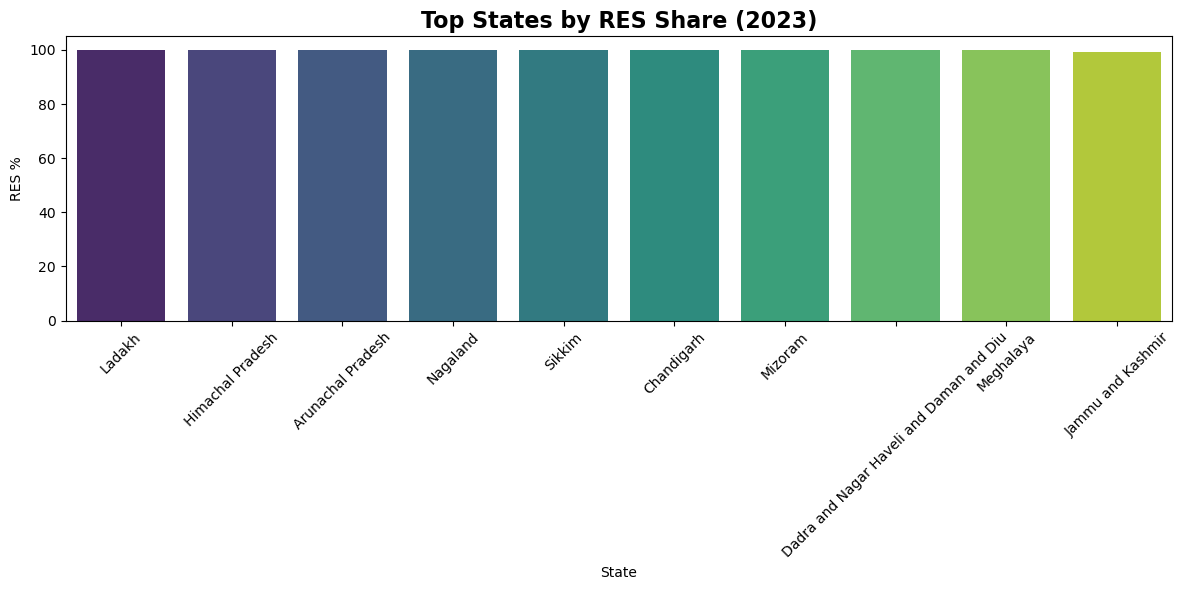

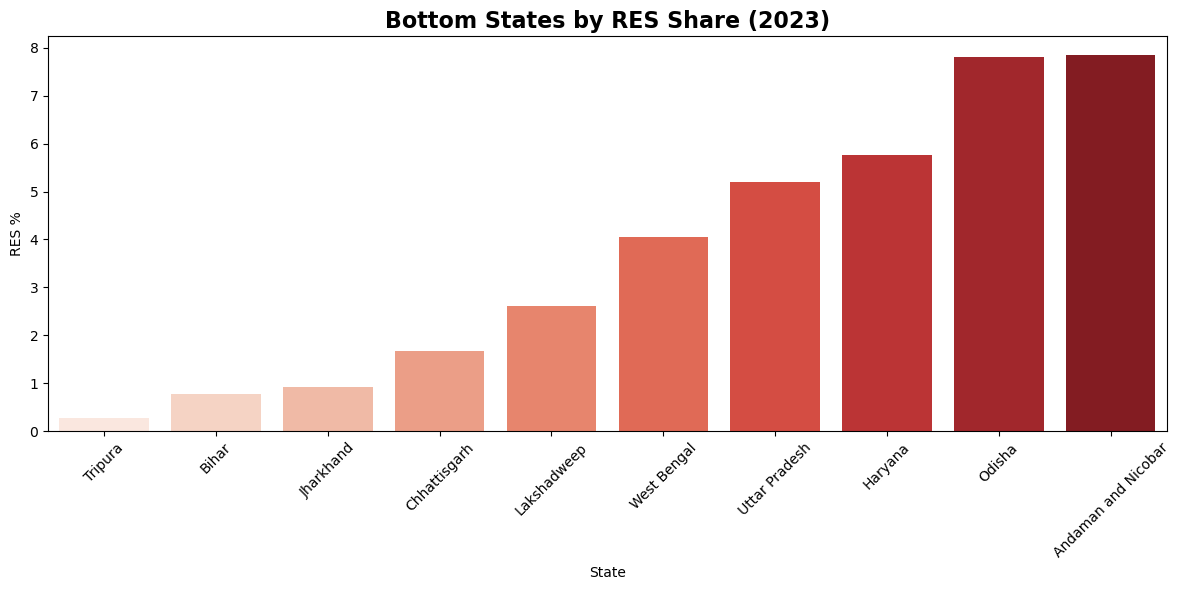

In [37]:
# Top
plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='State', y='RES %', palette='viridis')
plt.title("Top States by RES Share (2023)", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bottom
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_states, x='State', y='RES %', palette='Reds')
plt.title("Bottom States by RES Share (2023)", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt



Epoch 1/100

1/1 [==============================] - 5s 5s/step - loss: 0.8383
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.8213
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.8043
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7873
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7701
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7526
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 0.7346
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7162
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6971
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6774
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6569
Epoch 12/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6355
Epoch 13/100
1/1 [==============================]

1/1 [==============================] - 0s 13ms/step - loss: 8.8212e-04
Epoch 96/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2663e-04
Epoch 97/100
1/1 [==============================] - 0s 10ms/step - loss: 7.7522e-04
Epoch 98/100
1/1 [==============================] - 0s 19ms/step - loss: 7.3217e-04
Epoch 99/100
1/1 [==============================] - 0s 11ms/step - loss: 6.9994e-04
Epoch 100/100
1/1 [==============================] - 0s 9ms/step - loss: 6.7903e-04


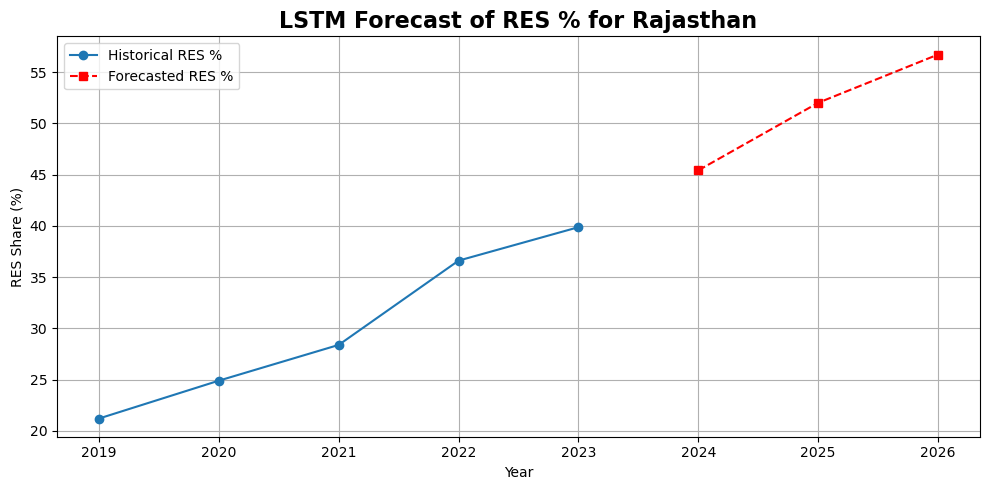

   Year  Predicted RES %
0  2024        45.426785
1  2025        52.020798
2  2026        56.730675


In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# -------- Parameters --------
state_name = 'Rajasthan'  # You can change this to any state
min_sequence = 2       # Minimum sequence length if data is low
forecast_years = 3     # Number of years to predict

# -------- Step 1: Extract and check data --------
state_df = statewise_mix[statewise_mix['State'] == state_name][['Year', 'RES %']].dropna().sort_values(by='Year')
available_points = len(state_df)

# Choose safe sequence length
sequence_length = min(3, available_points - 1)
if sequence_length < min_sequence:
    raise ValueError(f"Not enough data to train LSTM for {state_name}. Available points: {available_points}")

# Scale RES %
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(state_df[['RES %']])

# -------- Step 2: Prepare LSTM Sequences --------
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# -------- Step 3: Build and Train LSTM --------
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=100, verbose=1)

# -------- Step 4: Forecast Future RES % --------
future_preds = []
last_sequence = scaled_data[-sequence_length:]

for _ in range(forecast_years):
    input_seq = last_sequence.reshape((1, sequence_length, 1))
    pred_scaled = model.predict(input_seq, verbose=0)
    future_preds.append(pred_scaled[0][0])
    last_sequence = np.append(last_sequence[1:], pred_scaled)

# Inverse transform to get actual values
future_preds_actual = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# -------- Step 5: Plot Forecast --------
future_years = list(range(int(state_df['Year'].max()) + 1, int(state_df['Year'].max()) + 1 + forecast_years))
forecast_df = pd.DataFrame({'Year': future_years, 'Predicted RES %': future_preds_actual.flatten()})

# Combine for plot
plt.figure(figsize=(10, 5))
plt.plot(state_df['Year'], state_df['RES %'], marker='o', label='Historical RES %')
plt.plot(forecast_df['Year'], forecast_df['Predicted RES %'], marker='s', linestyle='--', color='red', label='Forecasted RES %')
plt.title(f"LSTM Forecast of RES % for {state_name}", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("RES Share (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecasted values
print(forecast_df)



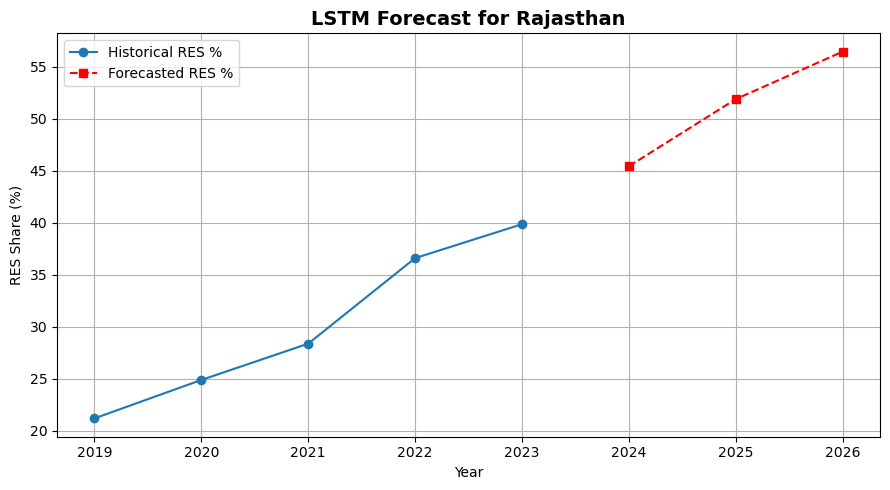

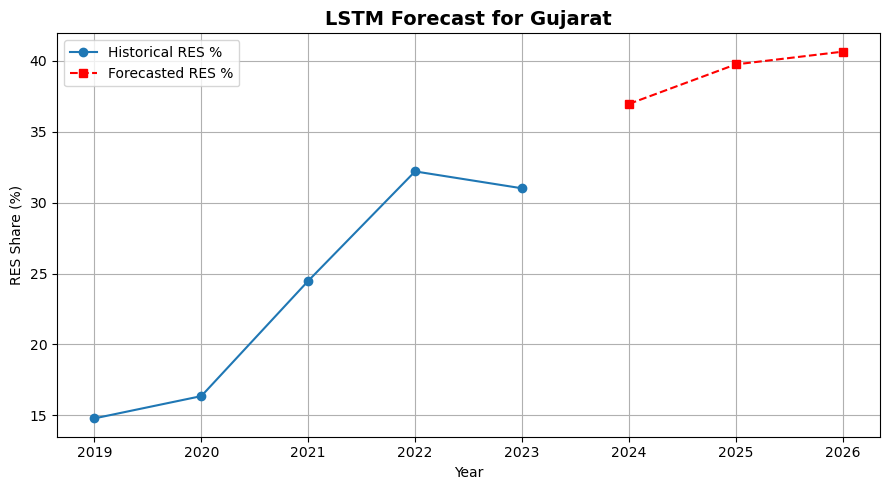

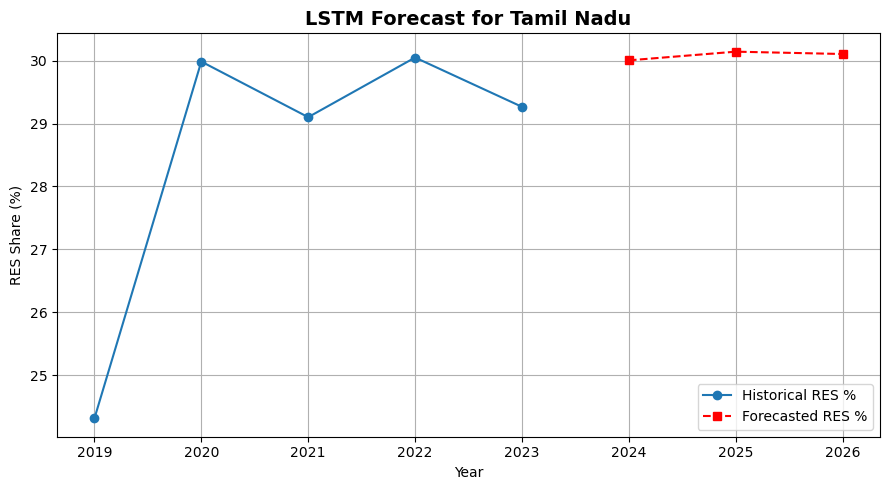

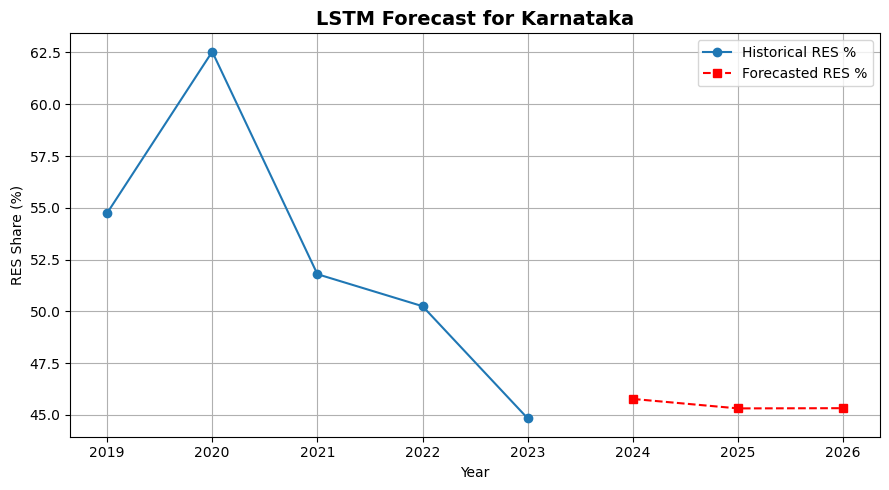

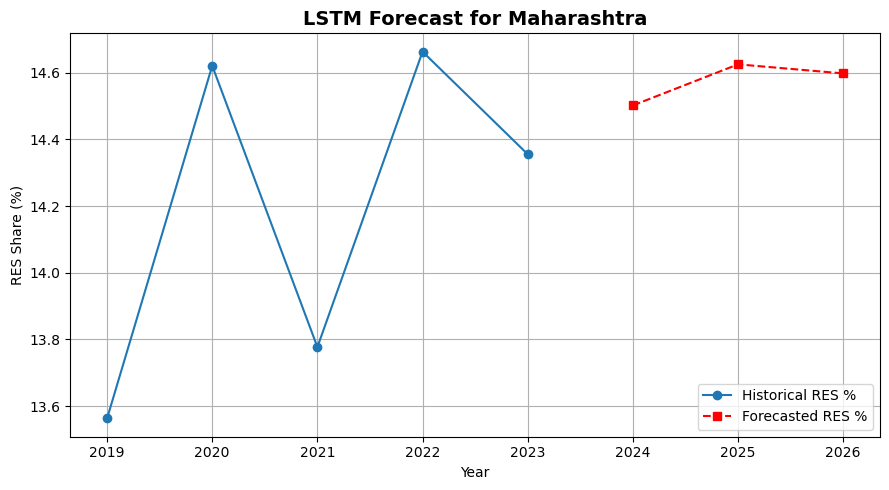

          State  Year  Predicted RES %
0     Rajasthan  2024        45.447540
1     Rajasthan  2025        51.904835
2     Rajasthan  2026        56.472179
3       Gujarat  2024        36.957951
4       Gujarat  2025        39.746044
5       Gujarat  2026        40.644375
6    Tamil Nadu  2024        30.004335
7    Tamil Nadu  2025        30.142109
8    Tamil Nadu  2026        30.105001
9     Karnataka  2024        45.769512
10    Karnataka  2025        45.312801
11    Karnataka  2026        45.323460
12  Maharashtra  2024        14.502090
13  Maharashtra  2025        14.625340
14  Maharashtra  2026        14.598157


In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# -------- Parameters --------
forecast_years = 3
sequence_length = 3
min_sequence = 2
top_states = ['Rajasthan', 'Gujarat', 'Tamil Nadu', 'Karnataka', 'Maharashtra']

# -------- Container for forecasts --------
forecast_all = []

for state_name in top_states:
    # Filter state data
    state_df = statewise_mix[statewise_mix['State'] == state_name][['Year', 'RES %']].dropna().sort_values(by='Year')
    if len(state_df) <= sequence_length:
        print(f"Skipping {state_name} (not enough data)")
        continue

    # Scale data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(state_df[['RES %']])
    
    # Build sequences
    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=100, verbose=0)

    # Forecast next 3 years
    future_preds = []
    last_sequence = scaled_data[-sequence_length:]
    for _ in range(forecast_years):
        input_seq = last_sequence.reshape((1, sequence_length, 1))
        pred_scaled = model.predict(input_seq, verbose=0)
        future_preds.append(pred_scaled[0][0])
        last_sequence = np.append(last_sequence[1:], pred_scaled)

    # Inverse transform
    predicted_res = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))
    future_years = list(range(int(state_df['Year'].max()) + 1, int(state_df['Year'].max()) + 1 + forecast_years))
    
    # Add to forecast list
    for yr, val in zip(future_years, predicted_res.flatten()):
        forecast_all.append({'State': state_name, 'Year': yr, 'Predicted RES %': val})

    # Plot for each state
    plt.figure(figsize=(9, 5))
    plt.plot(state_df['Year'], state_df['RES %'], marker='o', label='Historical RES %')
    plt.plot(future_years, predicted_res.flatten(), marker='s', linestyle='--', color='red', label='Forecasted RES %')
    plt.title(f"LSTM Forecast for {state_name}", fontsize=14, fontweight='bold')
    plt.xlabel("Year")
    plt.ylabel("RES Share (%)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Convert results to DataFrame
forecast_df_all = pd.DataFrame(forecast_all)
print(forecast_df_all)
